In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#Read CSV
df = pd.read_csv('job_posting_clean.csv')

# Do remote jobs pay more or less than on-site jobs?

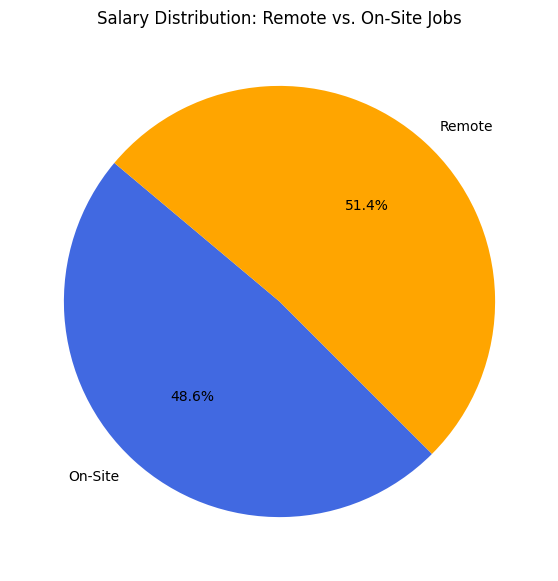

In [33]:
# Categorize jobs into Remote and On-Site
df["job_type"] = df["remote_allowed"].apply(lambda x: "Remote" if x == 1 else "On-Site")

# Compute average median salary for Remote vs. On-Site jobs
salary_comparison = df.groupby("job_type")["yearly_med_salary"].mean()

# Plot pie chart
plt.figure(figsize=(7, 7))
colors = ["royalblue", "orange"]
salary_comparison.plot(kind="pie", autopct="%1.1f%%", colors=colors, startangle=140)

plt.ylabel("")  
plt.title("Salary Distribution: Remote vs. On-Site Jobs")


plt.show()

# How do salaries differ across experience levels?

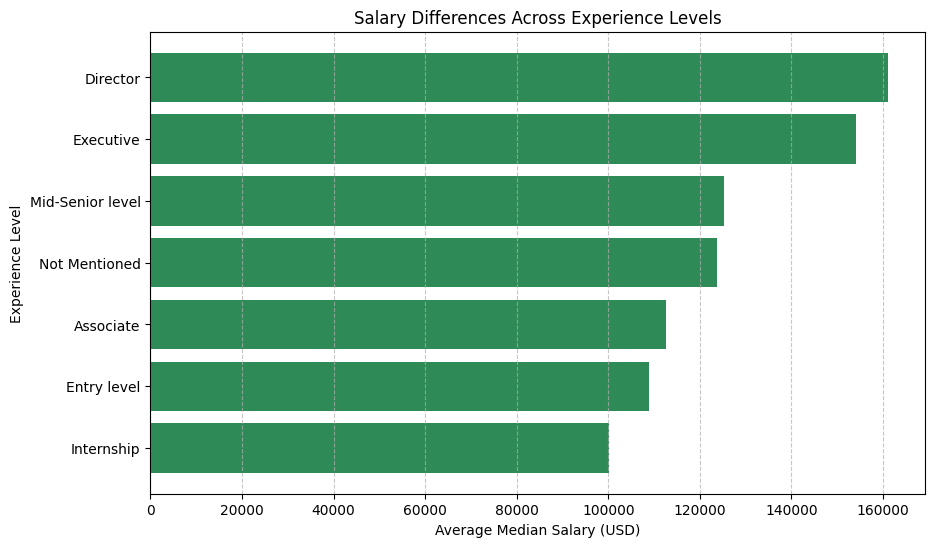

In [34]:
# Group by experience level and calculate the average median salary
experience_salary = df.groupby("formatted_experience_level")["yearly_med_salary"].mean().reset_index()

# Sort experience levels for better visualization
experience_salary = experience_salary.sort_values(by="yearly_med_salary", ascending=False)

# Plot salary distribution by experience level
plt.figure(figsize=(10, 6))
plt.barh(experience_salary["formatted_experience_level"], experience_salary["yearly_med_salary"], color="seagreen")
plt.xlabel("Average Median Salary (USD)")
plt.ylabel("Experience Level")
plt.title("Salary Differences Across Experience Levels")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Which jobs offer the highest salary?

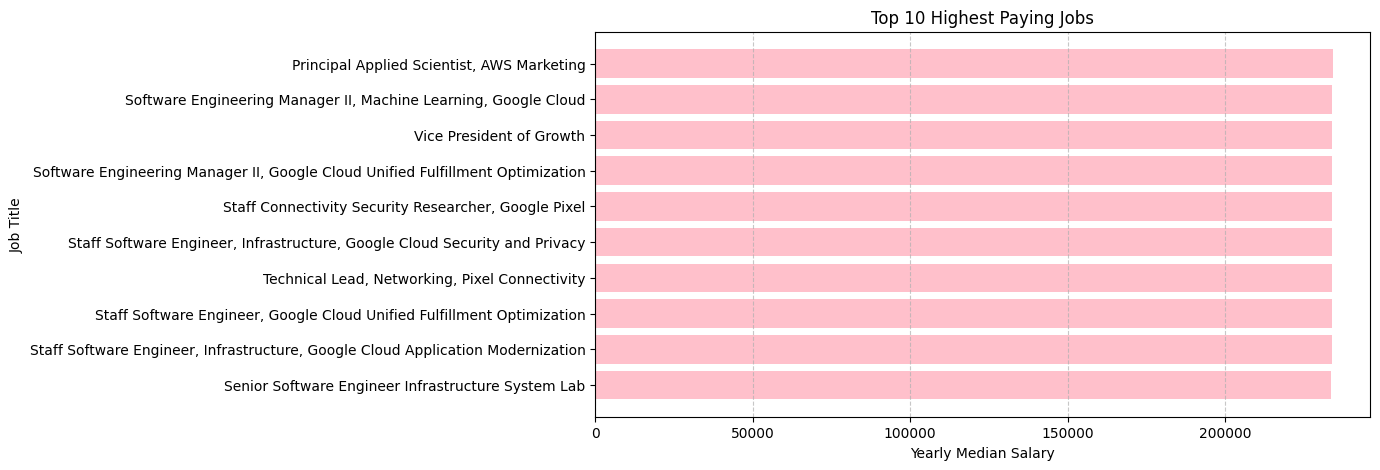

In [35]:
# Get the top 10 highest paying jobs
top_jobs = df.nlargest(20, ['yearly_med_salary'])

# Plot job titles vs yearly median salary
plt.figure(figsize=(10, 5))
plt.barh(top_jobs['title'].astype(str), top_jobs['yearly_med_salary'], color='pink')
plt.xlabel("Yearly Median Salary")
plt.ylabel("Job Title")
plt.title("Top 10 Highest Paying Jobs")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()